*Audiencia *
Usuarios de plataforma de striming para ver peliculas

Contexto Comercial

La gran cantidad de posibles peliculas o series que ofrecen los servicios de streming hacen que muchas veces se dificulte tomar una decicion acertada de que poder ver.

Objetivo

El objetivo de este proyecto ser generar un recomendador de peliculas o series basados en los gustos de los usuarios

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import warnings
import re
import sklearn
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#warnings.filterwarnings('ignore')
%matplotlib inline

In [248]:
!pip install mlxtend 

In [249]:
peliculas=pd.read_csv("titles1.csv")
creditos=pd.read_csv("credits1.csv")

In [250]:
creditos=creditos.drop("character",1)


C:\Users\54351\AppData\Local\Temp\ipykernel_2292\1289208615.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [251]:
actores=creditos[creditos["role"]=="ACTOR"].groupby("id")["name"].apply(lambda x: ','.join(x)).reset_index()
actores.columns=["id","actors"]

In [252]:
peliculas=pd.merge(peliculas,actores,on="id")


In [253]:
directores=creditos[creditos["role"]=="DIRECTOR"].groupby("id")["name"].apply(lambda x: ','.join(x)).reset_index()
directores.columns=["id","director"]

In [254]:
peliculas=pd.merge(peliculas,directores,on="id")

In [255]:
peliculas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,"Robert De Niro,Jodie Foster,Albert Brooks,Harv...",Martin Scorsese
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,"Jon Voight,Burt Reynolds,Ned Beatty,Ronny Cox,...",John Boorman
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,"Graham Chapman,John Cleese,Eric Idle,Terry Gil...","Terry Jones,Terry Gilliam"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,"Lee Marvin,Ernest Borgnine,Charles Bronson,Jim...",Robert Aldrich
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800,"Graham Chapman,John Cleese,Terry Gilliam,Eric ...",Terry Jones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],NaN,tt16806990,7.0,66.0,2.112,NaN,"Ai Leng Ong,Chew Kin-Wah,Harith Iskander,Erra ...",Teddy Chan
3888,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN,"Maymay Entrata,Edward Barber,Snooky Serna,Jeff...",Barry Gonzalez
3889,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],NaN,tt14216488,5.0,327.0,2.545,5.300,"Ahmed Hatem,Jamila Awad,Mahmoud Al-Bezzawy,Sab...",Mohamed Bakir
3890,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN,"Richard Mofe-Damijo,Ego Nwosu,Keppy Ekpenyong-...",Seyi Babatope


In [256]:
peliculas["actors"]=peliculas["actors"].str.split(",").str[0]

In [257]:
peliculas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,Robert De Niro,Martin Scorsese
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300,Jon Voight,John Boorman
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,Graham Chapman,"Terry Jones,Terry Gilliam"
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600,Lee Marvin,Robert Aldrich
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800,Graham Chapman,Terry Jones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],NaN,tt16806990,7.0,66.0,2.112,NaN,Ai Leng Ong,Teddy Chan
3888,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN,Maymay Entrata,Barry Gonzalez
3889,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],NaN,tt14216488,5.0,327.0,2.545,5.300,Ahmed Hatem,Mohamed Bakir
3890,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN,Richard Mofe-Damijo,Seyi Babatope


In [258]:
peliculas["actors"].value_counts()

Shah Rukh Khan         17
Ajay Devgn             12
Adam Sandler           11
Akshay Kumar           11
Shahid Kapoor          11
                       ..
Trevor Devall           1
Steve Coogan            1
Anne Winters            1
Ashleigh Murray         1
Richard Mofe-Damijo     1
Name: actors, Length: 2900, dtype: int64

# Limpieza

In [259]:
peliculas["genres"]=peliculas["genres"].astype(str)
peliculas["genres"]=peliculas["genres"].str.split(",").str[0]
peliculas["genres"]=peliculas["genres"].str.replace("[","")
peliculas["genres"]=peliculas["genres"].str.replace("]","")
peliculas["genres"]=peliculas["genres"].str.replace("'","")
peliculas["genres"]=peliculas["genres"].replace("","No Genre")

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\840101766.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\840101766.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [260]:
peliculas["production_countries	"]=peliculas["production_countries"].astype(str)
peliculas["production_countries"]=peliculas["production_countries"].str.split(",").str[0]
peliculas["production_countries"]=peliculas["production_countries"].str.replace("[","")
peliculas["production_countries"]=peliculas["production_countries"].str.replace("]","")
peliculas["production_countries"]=peliculas["production_countries"].str.replace("'","")
peliculas["production_countries"]=peliculas["production_countries"].replace("","XX")

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\2571265646.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\2571265646.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [261]:
peliculas["seasons"]=peliculas["seasons"].fillna(1)
peliculas["imdb_score"]=peliculas["imdb_score"].fillna(peliculas["imdb_score"].mean()) 
peliculas["imdb_votes"]=peliculas["imdb_votes"].fillna(peliculas["imdb_votes"].mean())
peliculas["tmdb_score"]=peliculas["tmdb_score"].fillna(peliculas["tmdb_score"].mean()) 
peliculas["tmdb_popularity"]=peliculas["tmdb_popularity"].fillna(peliculas["tmdb_popularity"].mean())
peliculas["age_certification"]=peliculas["age_certification"].fillna(peliculas["age_certification"].mode()[0])

In [262]:
peliculas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director,production_countries\t
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,1.0,tt0075314,8.2,808582.0,40.965,8.179000,Robert De Niro,Martin Scorsese,['US']
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,1.0,tt0068473,7.7,107673.0,10.010,7.300000,Jon Voight,John Boorman,['US']
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,1.0,tt0071853,8.2,534486.0,15.461,7.811000,Graham Chapman,"Terry Jones,Terry Gilliam",['GB']
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,R,150,war,GB,1.0,tt0061578,7.7,72662.0,20.398,7.600000,Lee Marvin,Robert Aldrich,"['GB', 'US']"
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,1.0,tt0079470,8.0,395024.0,17.770,7.800000,Graham Chapman,Terry Jones,['GB']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,R,102,comedy,MY,1.0,tt16806990,7.0,66.0,2.112,6.598963,Ai Leng Ong,Teddy Chan,['MY']
3888,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,R,115,comedy,PH,1.0,tt13399802,7.1,50.0,1.383,6.598963,Maymay Entrata,Barry Gonzalez,['PH']
3889,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,R,93,romance,EG,1.0,tt14216488,5.0,327.0,2.545,5.300000,Ahmed Hatem,Mohamed Bakir,['EG']
3890,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,R,100,romance,NG,1.0,tt13857480,6.8,45.0,1.466,6.598963,Richard Mofe-Damijo,Seyi Babatope,['NG']


In [263]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 0 to 3891
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3892 non-null   object 
 1   title                  3892 non-null   object 
 2   type                   3892 non-null   object 
 3   description            3889 non-null   object 
 4   release_year           3892 non-null   int64  
 5   age_certification      3892 non-null   object 
 6   runtime                3892 non-null   int64  
 7   genres                 3892 non-null   object 
 8   production_countries   3892 non-null   object 
 9   seasons                3892 non-null   float64
 10  imdb_id                3654 non-null   object 
 11  imdb_score             3892 non-null   float64
 12  imdb_votes             3892 non-null   float64
 13  tmdb_popularity        3892 non-null   float64
 14  tmdb_score             3892 non-null   float64
 15  acto

In [264]:
peliculas.isnull().sum()

id                          0
title                       0
type                        0
description                 3
release_year                0
age_certification           0
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                   238
imdb_score                  0
imdb_votes                  0
tmdb_popularity             0
tmdb_score                  0
actors                      0
director                    0
production_countries\t      0
dtype: int64

In [265]:
peliculas=peliculas.dropna()
peliculas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director,production_countries\t
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,1.0,tt0075314,8.2,808582.0,40.965,8.179000,Robert De Niro,Martin Scorsese,['US']
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,1.0,tt0068473,7.7,107673.0,10.010,7.300000,Jon Voight,John Boorman,['US']
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,1.0,tt0071853,8.2,534486.0,15.461,7.811000,Graham Chapman,"Terry Jones,Terry Gilliam",['GB']
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,R,150,war,GB,1.0,tt0061578,7.7,72662.0,20.398,7.600000,Lee Marvin,Robert Aldrich,"['GB', 'US']"
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,1.0,tt0079470,8.0,395024.0,17.770,7.800000,Graham Chapman,Terry Jones,['GB']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,R,102,comedy,MY,1.0,tt16806990,7.0,66.0,2.112,6.598963,Ai Leng Ong,Teddy Chan,['MY']
3888,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,R,115,comedy,PH,1.0,tt13399802,7.1,50.0,1.383,6.598963,Maymay Entrata,Barry Gonzalez,['PH']
3889,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,R,93,romance,EG,1.0,tt14216488,5.0,327.0,2.545,5.300000,Ahmed Hatem,Mohamed Bakir,['EG']
3890,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,R,100,romance,NG,1.0,tt13857480,6.8,45.0,1.466,6.598963,Richard Mofe-Damijo,Seyi Babatope,['NG']


In [266]:


# Contar la frecuencia de cada director
freq = peliculas['director'].value_counts().sort_values(ascending=False)

# Asignar valores numéricos a cada director según su frecuencia
values = {director: i for i, director in enumerate(freq.index, start=1)}

# Reemplazar los nombres de los directores por sus valores numéricos correspondientes
peliculas['director'] = peliculas['director'].map(values)




C:\Users\54351\AppData\Local\Temp\ipykernel_2292\839232806.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
# Crear una lista de directores únicos
directores_unicos = set(peliculas.director)

# Crear un diccionario de frecuencias
frecuencias_directores = {}
for director in directores_unicos:
    frecuencia = sum(peliculas.director == director)
    frecuencias_directores[director] = frecuencia

# Reemplazar el nombre del director con su frecuencia
peliculas.director = peliculas.director.apply(lambda x: frecuencias_directores[x])

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\992118083.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [268]:
peliculas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director,production_countries\t
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,1.0,tt0075314,8.2,808582.0,40.965,8.179000,Robert De Niro,5,['US']
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,1.0,tt0068473,7.7,107673.0,10.010,7.300000,Jon Voight,1,['US']
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,1.0,tt0071853,8.2,534486.0,15.461,7.811000,Graham Chapman,1,['GB']
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,R,150,war,GB,1.0,tt0061578,7.7,72662.0,20.398,7.600000,Lee Marvin,1,"['GB', 'US']"
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,1.0,tt0079470,8.0,395024.0,17.770,7.800000,Graham Chapman,1,['GB']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,R,102,comedy,MY,1.0,tt16806990,7.0,66.0,2.112,6.598963,Ai Leng Ong,2,['MY']
3888,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,R,115,comedy,PH,1.0,tt13399802,7.1,50.0,1.383,6.598963,Maymay Entrata,3,['PH']
3889,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,R,93,romance,EG,1.0,tt14216488,5.0,327.0,2.545,5.300000,Ahmed Hatem,1,['EG']
3890,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,R,100,romance,NG,1.0,tt13857480,6.8,45.0,1.466,6.598963,Richard Mofe-Damijo,2,['NG']


In [269]:
peliculas["director"].unique()

array([ 5,  1, 11,  2,  4,  3,  6,  8,  7, 12, 14, 15, 18], dtype=int64)

In [270]:
# Crear una lista de directores únicos
actores_unicos = set(peliculas.actors)

# Crear un diccionario de frecuencias
frecuencias_actores = {}
for actors in actores_unicos:
    frecuencias = sum(peliculas.actors == actors)
    frecuencias_actores[actors] = frecuencias

# Reemplazar el nombre del director con su frecuencia
peliculas.actors = peliculas.actors.apply(lambda x: frecuencias_actores[x])


C:\Users\54351\AppData\Local\Temp\ipykernel_2292\3702224438.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
peliculas.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director,production_countries\t
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,drama,US,1.0,tt0075314,8.2,808582.0,40.965,8.179,4,5,['US']
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,drama,US,1.0,tt0068473,7.7,107673.0,10.010,7.300,1,1,['US']
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,1.0,tt0071853,8.2,534486.0,15.461,7.811,5,1,['GB']
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,R,150,war,GB,1.0,tt0061578,7.7,72662.0,20.398,7.600,1,1,"['GB', 'US']"
4,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,1.0,tt0079470,8.0,395024.0,17.770,7.800,5,1,['GB']


In [272]:
genclasif=pd.DataFrame(peliculas.groupby("genres").mean().round(2))
genclasif=genclasif.reset_index()


In [273]:
peliculas["imdb_votes"]=peliculas["imdb_votes"].round(2)
peliculas["imdb_score"]=peliculas["imdb_score"].round(2)
peliculas["tmdb_popularity"]=peliculas["tmdb_popularity"].round(2)
peliculas["tmdb_score"]=peliculas["tmdb_score"].round(2)


C:\Users\54351\AppData\Local\Temp\ipykernel_2292\3195269132.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\3195269132.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\3195269132.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# Analisis

In [274]:
gen=pd.DataFrame(peliculas.drop(["title","id","imdb_id","production_countries\t","description"],1))
gen

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\4041621431.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director
0,MOVIE,1976,R,114,drama,US,1.0,8.2,808582.0,40.96,8.18,4,5
1,MOVIE,1972,R,109,drama,US,1.0,7.7,107673.0,10.01,7.30,1,1
2,MOVIE,1975,PG,91,fantasy,GB,1.0,8.2,534486.0,15.46,7.81,5,1
3,MOVIE,1967,R,150,war,GB,1.0,7.7,72662.0,20.40,7.60,1,1
4,MOVIE,1979,R,94,comedy,GB,1.0,8.0,395024.0,17.77,7.80,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,MOVIE,2022,R,102,comedy,MY,1.0,7.0,66.0,2.11,6.60,1,2
3888,MOVIE,2021,R,115,comedy,PH,1.0,7.1,50.0,1.38,6.60,1,3
3889,MOVIE,2021,R,93,romance,EG,1.0,5.0,327.0,2.54,5.30,1,1
3890,MOVIE,2021,R,100,romance,NG,1.0,6.8,45.0,1.47,6.60,1,2


In [275]:
gen.groupby("actors")["actors"].count()

actors
1     2220
2      632
3      306
4      196
5      110
6       42
7       49
8        8
9       18
10      10
11      33
12      12
17      17
Name: actors, dtype: int64

<AxesSubplot:xlabel='genres', ylabel='imdb_score'>

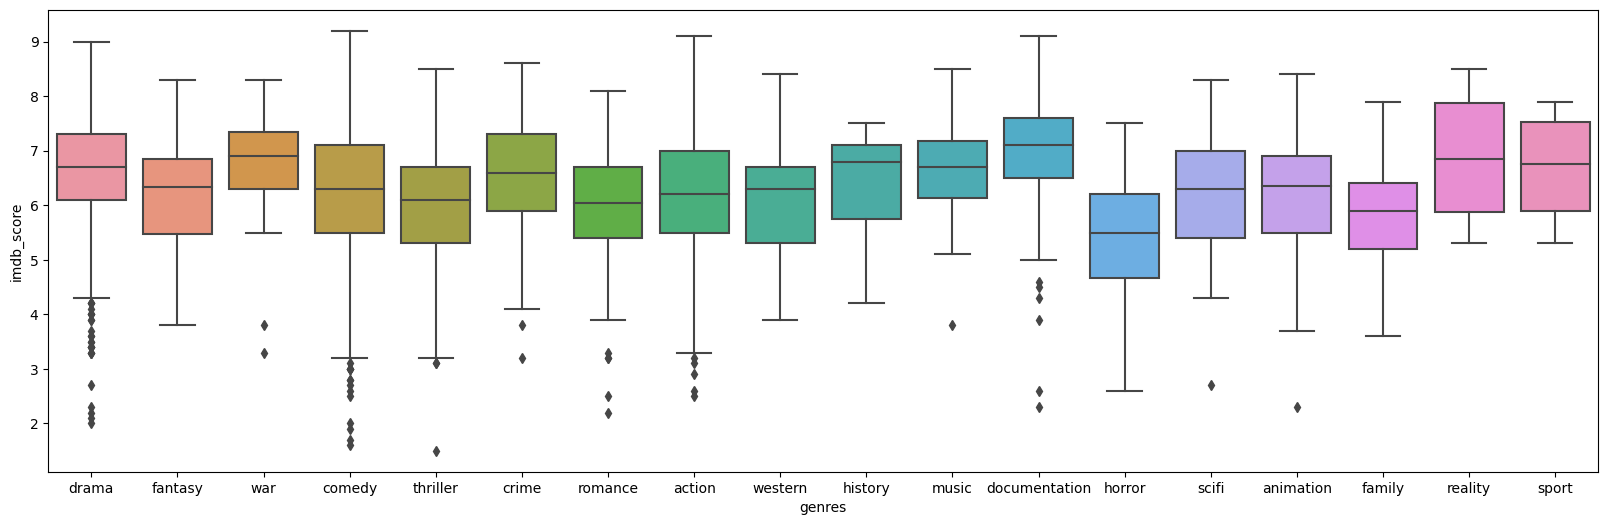

In [276]:
plt.figure(figsize=(20,6))
sns.boxplot(x="genres",y="imdb_score",data=peliculas)

<AxesSubplot:xlabel='genres', ylabel='tmdb_score'>

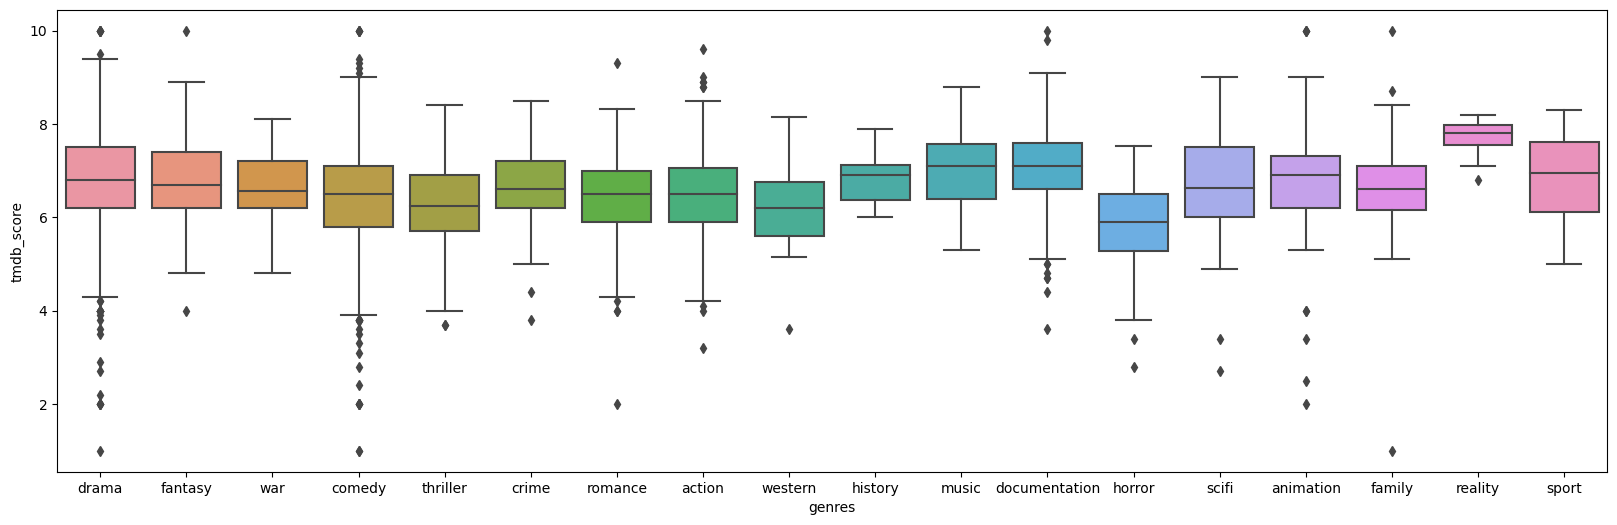

In [277]:
plt.figure(figsize=(20,6))
sns.boxplot(x="genres",y="tmdb_score",data=peliculas)

<AxesSubplot:xlabel='imdb_score', ylabel='imdb_votes'>

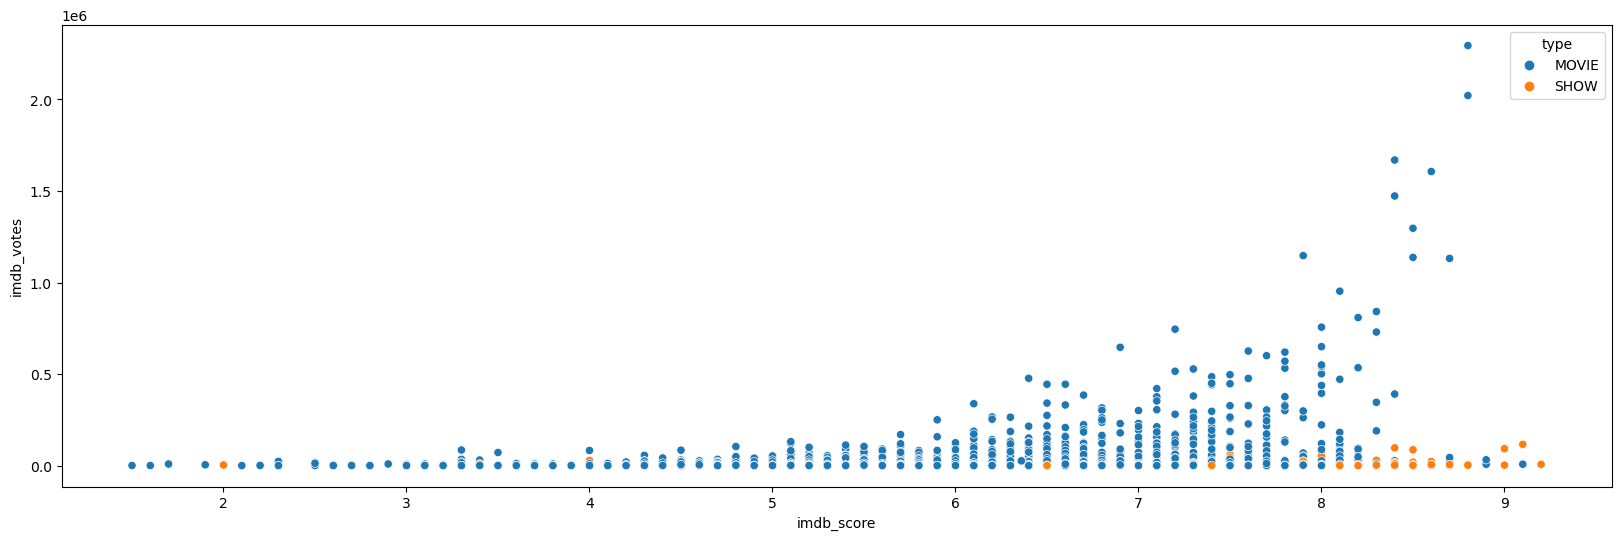

In [278]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="imdb_score",y="imdb_votes",data=gen,hue="type")

<AxesSubplot:xlabel='imdb_score', ylabel='tmdb_popularity'>

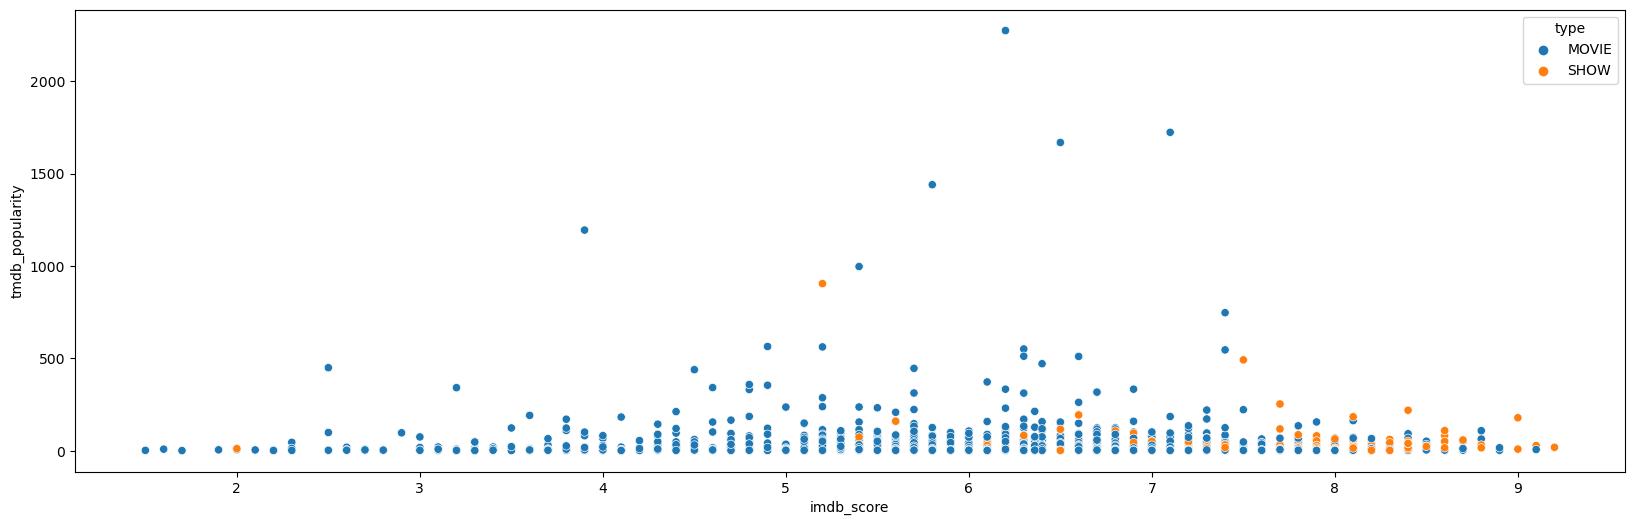

In [279]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="imdb_score",y="tmdb_popularity",data=gen,hue="type")

<AxesSubplot:xlabel='imdb_score', ylabel='runtime'>

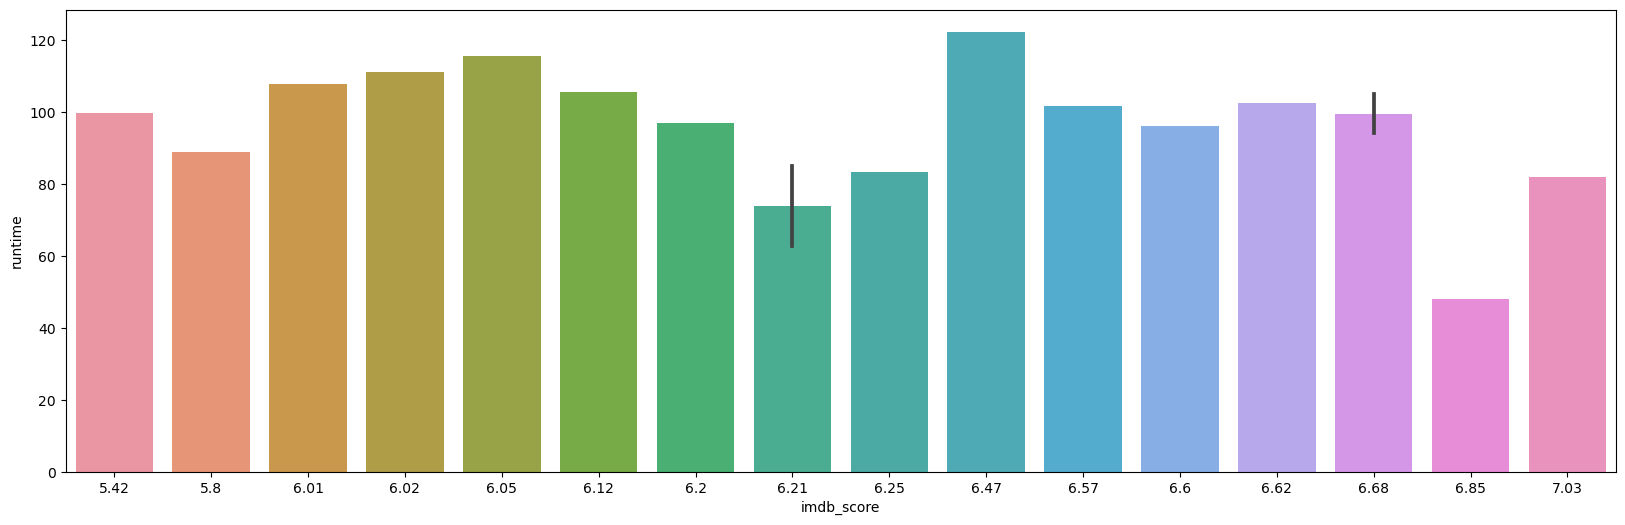

In [280]:
plt.figure(figsize=(20,6))
sns.barplot(x="imdb_score",y="runtime",data=genclasif)

<AxesSubplot:xlabel='genres', ylabel='release_year'>

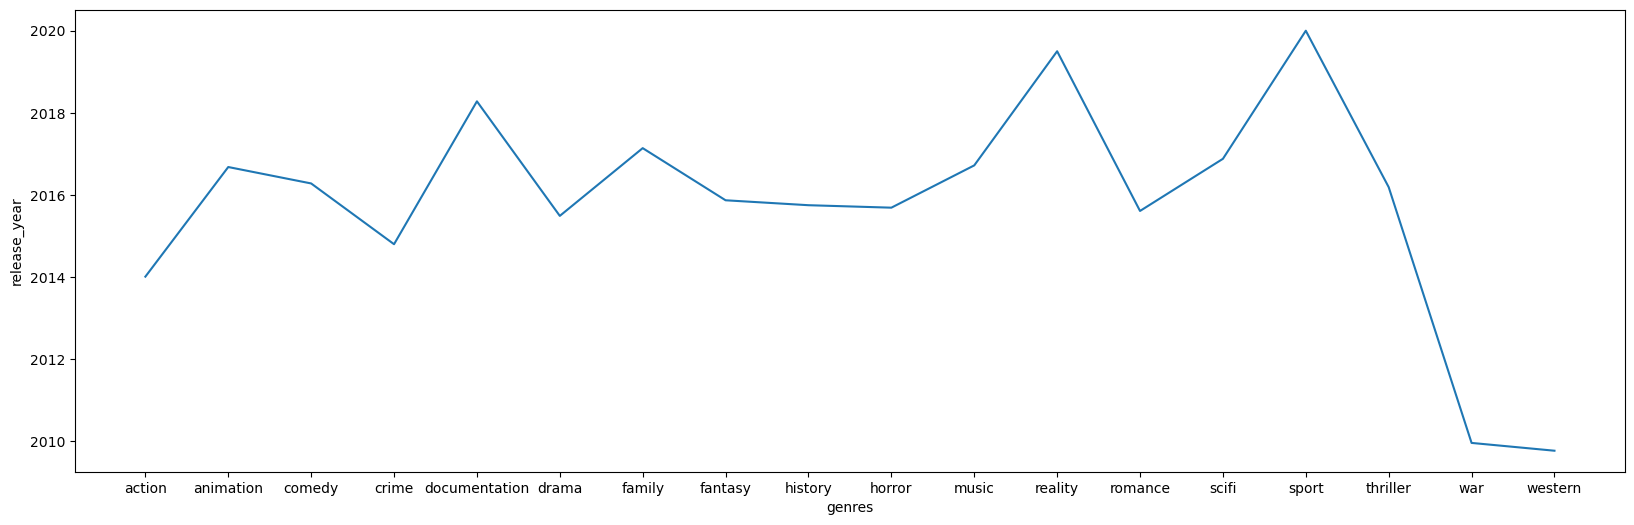

In [281]:
plt.figure(figsize=(20,6))
sns.lineplot(x="genres",y="release_year",data=genclasif)

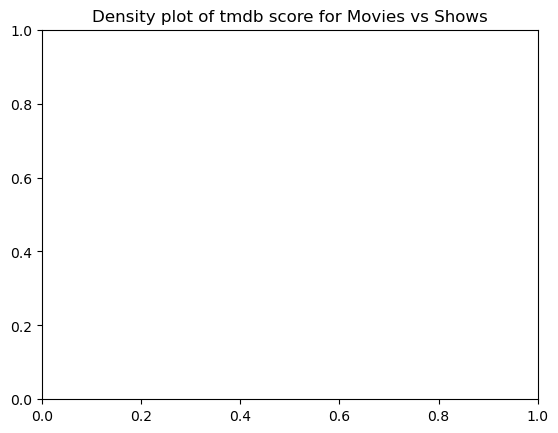

In [282]:

sns.kdeplot(gen.loc[gen['type'] == 1,'tmdb_score'],shade = False, label="Movie",color="g")
sns.kdeplot(gen.loc[gen['type'] == 2,'tmdb_score'],shade = False, label="Show",color="r")
plt.title("Density plot of tmdb score for Movies vs Shows");

# Convierto las variables categoricas en numericas

In [283]:
gen["production_countries"].unique()

array(['US', 'GB', 'EG', 'DE', 'IN', 'SU', 'XX', 'LB', 'DZ', 'CA', 'JP',
       'AR', 'FR', 'PE', 'IT', 'IE', 'HK', 'MX', 'ES', 'PS', 'BE', 'MT',
       'AU', 'KR', 'CN', 'CL', 'TR', 'CZ', 'TW', 'NG', 'MY', 'Lebanon',
       'PH', 'AE', 'ZA', 'RU', 'ID', 'IL', 'AT', 'DK', 'CD', 'BR', 'VE',
       'RO', 'NZ', 'CH', 'GH', 'UA', 'IS', 'SE', 'NL', 'SG', 'TN', 'GL',
       'PT', 'QA', 'SA', 'PK', 'VN', 'PR', 'IQ', 'HU', 'TH', 'IR', 'GE',
       'CU', 'BG', 'LU', 'NO', 'CO', 'KH', 'PL', 'KE', 'RS', 'TZ', 'PY',
       'ZW', 'KW', 'NP', 'CM', 'BD', 'KG', 'BT', 'JO', 'FI', 'MU', 'UY',
       'MA', 'GR'], dtype=object)

In [284]:
paises = {'US': 1, 'GB': 2, 'EG': 3, 'DE': 4, 'IN': 5, 'SU': 6, 'LB': 7, 'XX': 8, 'DZ': 9, 'CA': 10, 'JP': 11, 'AR': 12, 'FR': 13, 'PE': 14, 'IT': 15, 'IE': 16, 'HK': 17, 'AU': 18, 'MX': 19, 'ES': 20, 'PS': 21, 'BE': 22, 'DK': 23, 'MT': 24, 'RU': 25, 'KR': 26, 'CN': 27, 'CO': 28, 'CL': 29, 'TR': 30, 'CZ': 31, 'TW': 32, 'SG': 33, 'NG': 34, 'MY': 35, 'Lebanon': 36, 'ZA': 37, 'PH': 38, 'AE': 39, 'HU': 40, 'NO': 41, 'SA': 42, 'ID': 43, 'FI': 44, 'IL': 45, 'AT': 46, 'CD': 47, 'BR': 48, 'PL': 49, 'VE': 50, 'RO': 51, 'NZ': 52, 'UA': 53, 'CH': 54, 'GH': 55, 'BY': 56, 'IS': 57, 'SE': 58, 'NL': 59, 'HR': 60, 'TN': 61, 'GL': 62, 'PT': 63, 'QA': 64, 'PK': 65, 'VN': 66, 'PR': 67, 'IQ': 68, 'TH': 69, 'IR': 70, 'GE': 71, 'CU': 72, 'BG': 73, 'LU': 74, 'KH': 75, 'KE': 76, 'RS': 77, 'TZ': 78, 'PY': 79, 'ZW': 80, 'KW': 81, 'NP': 82, 'CM': 83, 'BD': 84, 'KG': 85, 'BT': 86, 'JO': 87, 'MU': 88, 'IO': 89, 'SN': 90, 'UY': 91, 'MA': 92, 'GT': 93, 'GR': 94, 'AF': 95}


In [285]:
gen["production_countries"]=gen["production_countries"].replace(paises)

In [286]:
gen["genres"].unique()


array(['drama', 'fantasy', 'war', 'comedy', 'thriller', 'crime',
       'romance', 'action', 'western', 'history', 'music',
       'documentation', 'horror', 'scifi', 'animation', 'family',
       'reality', 'sport'], dtype=object)

In [287]:
generos = {'drama': 1, 'fantasy': 2, 'war': 3, 'comedy': 4, 'thriller': 5, 'crime': 6, 
           'romance': 7, 'action': 8, 'western': 9, 'history': 10, 'documentation': 11,
           'music': 12, 'horror': 13, 'scifi': 14, 'animation': 15, 'family': 16, 
           'reality': 17, 'No Genre': 18, 'sport': 19}

In [288]:
gen["genres"]=gen["genres"].replace(generos)

In [289]:
gen["age_certification"].unique()

array(['R', 'PG', 'PG-13', 'TV-MA', 'TV-Y', 'TV-14', 'G', 'TV-PG',
       'TV-Y7', 'TV-G', 'NC-17'], dtype=object)

In [290]:
gen["age_certification"]=gen["age_certification"].replace("G",1)
gen["age_certification"]=gen["age_certification"].replace("TV-G",1)
gen["age_certification"]=gen["age_certification"].replace("TV-Y7",1)
gen["age_certification"]=gen["age_certification"].replace("TV-Y",1)

gen["age_certification"]=gen["age_certification"].replace("PG",2)
gen["age_certification"]=gen["age_certification"].replace("TV-PG",2)

gen["age_certification"]=gen["age_certification"].replace("PG-13",3)
gen["age_certification"]=gen["age_certification"].replace("TV-14",3)
gen["age_certification"]=gen["age_certification"].replace("TV-MA",3)

gen["age_certification"]=gen["age_certification"].replace("R",4)
gen["age_certification"]=gen["age_certification"].replace("NC-17",4)

In [291]:
gen["age_certification"].unique()

array([4, 2, 3, 1], dtype=int64)

In [292]:
gen["type"].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [293]:
gen["type"]=gen["type"].replace("MOVIE",1)
gen["type"]=gen["type"].replace("SHOW",2)

In [294]:
gen["age_certification"] = gen["age_certification"].astype("object")
gen["genres"] = gen["genres"].astype("object")
gen["production_countries"] = gen["production_countries"].astype("object")
gen["type"] = gen["type"].astype("object")


In [230]:
gen.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director
count,3653.000000,3653.000000,3653.000000,3653.000000,3.653000e+03,3653.000000,3653.000000,3653.000000,3653.000000
mean,2015.966055,95.121818,1.048727,6.357175,2.591213e+04,21.472814,6.596699,2.040241,1.956474
std,7.511688,32.278170,0.427468,1.132852,1.033974e+05,79.317049,1.058349,2.073346,2.309090
min,1954.000000,0.000000,1.000000,1.500000,5.000000e+00,0.600000,1.000000,1.000000,1.000000
25%,2015.000000,78.000000,1.000000,5.700000,6.920000e+02,2.950000,6.000000,1.000000,1.000000
50%,2018.000000,97.000000,1.000000,6.400000,2.766000e+03,6.860000,6.600000,1.000000,1.000000
75%,2020.000000,113.000000,1.000000,7.200000,1.184400e+04,15.940000,7.250000,2.000000,2.000000
max,2022.000000,240.000000,13.000000,9.200000,2.294231e+06,2274.040000,10.000000,17.000000,18.000000


In [231]:
genclasif=pd.DataFrame(gen.groupby("genres").mean().round(2))
genclasif=genclasif.reset_index()


In [232]:

clases= {'generos': gen["genres"],
        "edades": gen["age_certification"],
        "paises": gen['production_countries'],
        'tipo': gen["type"]}
genclasif1= pd.DataFrame(clases)



genclasif2 = genclasif1.groupby('generos').agg({'edades': lambda x: x.mode().iloc[0],
                                  'paises': lambda x: x.mode().iloc[0],
                                  'tipo': lambda x: x.mode().iloc[0]})



In [233]:
genclasif2=genclasif2.reset_index()

In [234]:
GENEROS=genclasif.join(genclasif2)
GENEROS=GENEROS.drop("generos",1)
GENEROS


C:\Users\54351\AppData\Local\Temp\ipykernel_2292\2668961171.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,genres,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actors,director,edades,paises,tipo
0,1,2015.49,102.34,1.02,6.62,27227.66,16.85,6.78,2.04,1.74,4,5,1
1,2,2015.87,96.92,1.00,6.20,32750.75,31.50,6.80,1.95,1.57,4,1,1
2,3,2009.96,104.82,1.00,6.68,45158.82,18.75,6.62,1.89,1.75,4,1,1
3,4,2016.28,85.04,1.02,6.21,12050.71,15.99,6.42,2.18,2.87,4,1,1
4,5,2016.19,107.78,1.01,6.01,45733.13,25.18,6.25,2.20,1.44,4,1,1
5,6,2014.80,101.68,1.06,6.57,63908.35,18.19,6.69,2.12,1.72,4,1,1
6,7,2015.61,111.00,1.00,6.02,12385.43,21.10,6.41,2.73,2.09,4,5,1
7,8,2014.01,105.34,1.09,6.12,50922.60,42.07,6.49,2.66,1.82,4,1,1
8,9,2009.77,115.46,1.00,6.05,135953.15,17.92,6.11,2.23,1.38,4,1,1
9,10,2015.75,122.25,1.00,6.47,29164.00,11.56,6.83,1.94,1.38,4,1,1


# ML2

In [235]:
x1=gen.drop(["imdb_score"],1)
y1=gen["imdb_score"]

C:\Users\54351\AppData\Local\Temp\ipykernel_2292\3809871937.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [236]:
x1.count()

type                    3653
release_year            3653
age_certification       3653
runtime                 3653
genres                  3653
production_countries    3653
seasons                 3653
imdb_votes              3653
tmdb_popularity         3653
tmdb_score              3653
actors                  3653
director                3653
dtype: int64

In [237]:
y1.count()

3653

In [238]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [239]:
model=LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [240]:
y_pred1= model.predict(X1_test)
mse = mean_squared_error(y1_test, y_pred1)
print("Error cuadrático medio: ", mse)

Error cuadrático medio:  0.8265406014829602


In [241]:
nueva_pelicula = pd.DataFrame({'title': ['Mi nueva película'],
                               'type': [1],
                               'description': ['Una nueva película'],
                               'release_year': [2020],
                               'age_certification': [3],
                               'runtime': [94],
                               'genres': [19],
                               'production_countries': [4],
                               'seasons': [1],
                               'imdb_id': ['tt1234567'],
                               'imdb_votes': [7082],
                               'tmdb_popularity': [8],
                               'tmdb_score': [7],
                               'actors':[1],
                               'director':[1]})


In [242]:
y_pred1 = model.predict(nueva_pelicula.drop(['title','description','imdb_id'],1))
print("Predicción de puntaje para la nueva película: ", y_pred1)

Predicción de puntaje para la nueva película:  [6.30395436]


C:\Users\54351\AppData\Local\Temp\ipykernel_2292\1069836613.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [243]:
0.8244352189062087

0.8244352189062087

Por lo que podemos ver la correlacion lineal que existe entre la varibles y la variable objetivo, no es muy buena esto se puede deber a que el modelo este expuesto a un underfiting u overfiting
Tambien podemos ver que el error cuadratico medio es de 0.8 y teniendo en cuenta que la variable objetivo puede variar de 1 a 10 no es lo mas optimo por lo que vamos a necesitar mas ajustes.